**Load the required libraries and data**

In [1]:
# Load the required libraries 
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
import ast 
import warnings 

warnings.filterwarnings("ignore")

In [2]:
# Load the data files 

# Information about the promotional offers that are possible to receive, and basic information 
# about each one including the promotional type, duration of the promotion, reward, and how the promotion 
# was distributed to customers.
portfolio = pd.read_csv("data/input/portfolio.csv")

# Dimensional data about each person, including their age, salary, and gender, there is one unique customer 
# for each record.
profile = pd.read_csv("data/input/profile.csv")

# Records show the different steps of promotional offers that a customer received. The different values of 
# receiving a promotion are receiving, viewing, and completing. You also see the different transactions 
# that a person made in the time since he became a customer. With all records, you see the day that they 
# interacted with Starbucks and the amount that is worth
transcript = pd.read_csv("data/input/transcript.csv")

# Explanatory Data Analysis 
## Data Inspection and Wrangling 

View the first few records of each of the dataset 

In [3]:
portfolio.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [4]:
profile.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [5]:
transcript.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


**Drop unnecessary columns**

In [6]:
# store the datasets to a list 
data  = [portfolio, profile, transcript]

for dataset in data:
    dataset.drop("Unnamed: 0", axis=1, inplace=True)
    
# confirm the operation 
profile.head()

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


How are the dataset structured? Lets view its info 

In [7]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


The portfolio dataset is complete with no null values, There are 10 records and 6 features. The dataset contains both numeric and non numeric features

In [8]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


The profile dataset contains null values, infact there are more than 4000 null values. There are 17000 records and a total of 5 features. Most features are numeric  

In [9]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


Transcript dataset is the largest dataset so far. Its complete with no null values. The dataset contains more than 30000 records and has only 4 features. Most of the features are non numeric while only one feature is numeric. 

### Wrangling and Cleaning 
#### Portfolio dataset 

In [10]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [11]:
channels = [] #stores all the channels for each individual portfolio

#Merge the channels into a single list
for channel in portfolio["channels"]:
    channel_list = ast.literal_eval(channel)
    
    for ch in channel_list:
        channels.append(ch)
    
# Find the unique channels 
unique_channels = list(np.unique(np.array(channels)))

# Find if channels exists in each individual portfolio 
for channel in unique_channels:
    globals()[channel] = [1 if channel in ch else 0 for ch in portfolio["channels"]]
    # Create a new column for the channel
    portfolio[channel] = globals()[channel]
    
# Delete the "channels" column 
portfolio.drop("channels", axis=1, inplace=True)

# Confirm the operation 
portfolio

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


#### Profile

In [12]:
profile.head()

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [13]:
# Lets find any id in the portfolios listed in the profiles
portfolio_ids =  list(portfolio["id"])
profile_ids = list(profile["id"])

for id_ in portfolio_ids:
    if id_ in profile_ids:
        print(id_)

An empty output shows no id from the portfolio was listed in the profile 

Convert the "became_member_on" to datetime datatype

In [14]:
became_member_on = pd.to_datetime(profile["became_member_on"], errors="coerce")
profile["became_member_on"] = [str(date.date()) for date in became_member_on]
profile.head()

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,1970-01-01,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,1970-01-01,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,1970-01-01,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,1970-01-01,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,1970-01-01,NaN


Lets count the total null values to find the source of null values  

In [15]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

All null values are from gender and income variables. Lets heck the count of null values corresponding in both gender and income variables

In [16]:
sum(profile['gender'].isnull() & profile['income'].isnull())

2175

Since income and gender are very important variables and both have corressponding null variables therefore there is a need to drop rows containing the null values 

In [17]:
profile.dropna(how = "any", inplace=True)
# confirm the operation 
profile.isna().sum().sum()

0

In [18]:
profile.shape

(14825, 5)

There are almost 15000 profiles left. Are there any duplicate records? Lets find out 

In [19]:
profile.duplicated().sum()

0

There are no duplicated records in the profile dataset. The profile dataset is now clean and ready for further analysis. Lets reindex it and get its final look

In [20]:
profile.reset_index(drop=True, inplace=True)

# Show the last five rows 
profile.tail()

,gender,age,id,became_member_on,income
14820,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,1970-01-01,54000.0
14821,M,61,2cb4f97358b841b9a9773a7aa05a9d77,1970-01-01,72000.0
14822,M,49,01d26f638c274aa0b965d24cefe3183f,1970-01-01,73000.0
14823,F,83,9dc1421481194dcd9400aec7c9ae6366,1970-01-01,50000.0
14824,F,62,e4052622e5ba45a8b96b59aba68cf068,1970-01-01,82000.0


Wait! the `became_member_on` seems to be unary(Contains one unique/distinct value - "1970-01-01") lets find out and drop it. 

In [21]:
profile["became_member_on"].nunique()

1

The variable contain one unique variable, lets drop it. 

In [22]:
profile.drop("became_member_on", inplace=True, axis=1)
# Verify the operation 
profile.head()

,gender,age,id,income
0,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0
2,M,68,e2127556f4f64592b11af22de27a7932,70000.0
3,M,65,389bc3fa690240e798340f5a15918d5c,53000.0
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0


#### Transcript

In [23]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


Find the dataset shape

In [24]:
transcript.shape

(306534, 4)

The "value" column in transcript has dictionary/json values. Lets find what they contain(their key).

In [25]:
# Extract values into a dictionaries and store them in a list 
values = [ast.literal_eval(value) for value in transcript["value"]]

# Get the keys of the dictionaries and store them to a list 
# distinct_keys = set(key for value in values for key in value.key())

value_keys = list() # to store all available keys in the dictionaries 

for value in values:
    keys = list(value.keys())
    for key in keys:
        value_keys.append(key)
        
distinct_keys = set(value_keys)
distinct_keys

{'amount', 'offer id', 'offer_id', 'reward'}

There are two similar key elements in the value feature, "offer_id" and "offer id". The "offer id" element need to be changed to "offer_id"

In [26]:
# Change "offer id" to "offer_id"
transcript["value"].replace("offer id", "offer_id", inplace=True, regex=True)

# Confirm the changes 
values = [ast.literal_eval(value) for value in transcript["value"]]

distinct_keys = set(key for value in values for key in value.keys())
distinct_keys

{'amount', 'offer_id', 'reward'}

Wow! The changes took place in the dataset.

In [27]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer_id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [66]:
transcript[transcript["event"]=="transaction"]["value"]

12654     {'amount': 0.8300000000000001}
12657                  {'amount': 34.56}
12659                  {'amount': 13.23}
12670                  {'amount': 19.51}
12671                  {'amount': 18.97}
                       ...              
306132    {'amount': 1.5899999999999999}
306133                  {'amount': 9.53}
306134                  {'amount': 3.61}
306135    {'amount': 3.5300000000000002}
306136                  {'amount': 4.05}
Name: value, Length: 138953, dtype: object

How complete is the dataset? Lets find the null values present and if there are any duplicated rows therein. 

In [28]:
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

There are no null values in the dataset

In [29]:
transcript.duplicated().sum()

397

There are duplicated records in the dataset that need to be removed. They will be removed while keeping the first one. This will affect the index but will be fixed by reindexing the dataset

In [30]:
# Drop the the duplicated records 
transcript.drop_duplicates(keep="first", inplace=True)

# Reseting index 
transcript.reset_index(drop=True, inplace=True)

# confirm the operation
print("Duplicated records: ", transcript.duplicated().sum())
# dataset dimensions 
print("Data shape: ", transcript.shape)
# check if last index corresponds to the dataset dimensions 
transcript.tail()

Duplicated records:  0
Data shape:  (306137, 4)


,person,event,value,time
306132,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306133,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306134,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306135,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714
306136,c02b10e8752c4d8e9b73f918558531f7,transaction,{'amount': 4.05},714


The last index corresponds with the size of the dataset. One last workaround is to check if the data types correspond with what is seen. This is especially for numeric and datetime features

In [31]:
transcript.dtypes

person    object
event     object
value     object
time       int64
dtype: object

The "time" feature is seen as numeric and also recognized by the machine as integer. **All the dataset are now clean**. Outliers will be removed upon visualization before making dashboards. 

## Data Visualizations 

Are there any ridiculous values in the "age" and "income" features? Lets plot some boxplots to show if there are any outliers. 

<AxesSubplot:title={'center':'Transcript data'}, xlabel='time'>

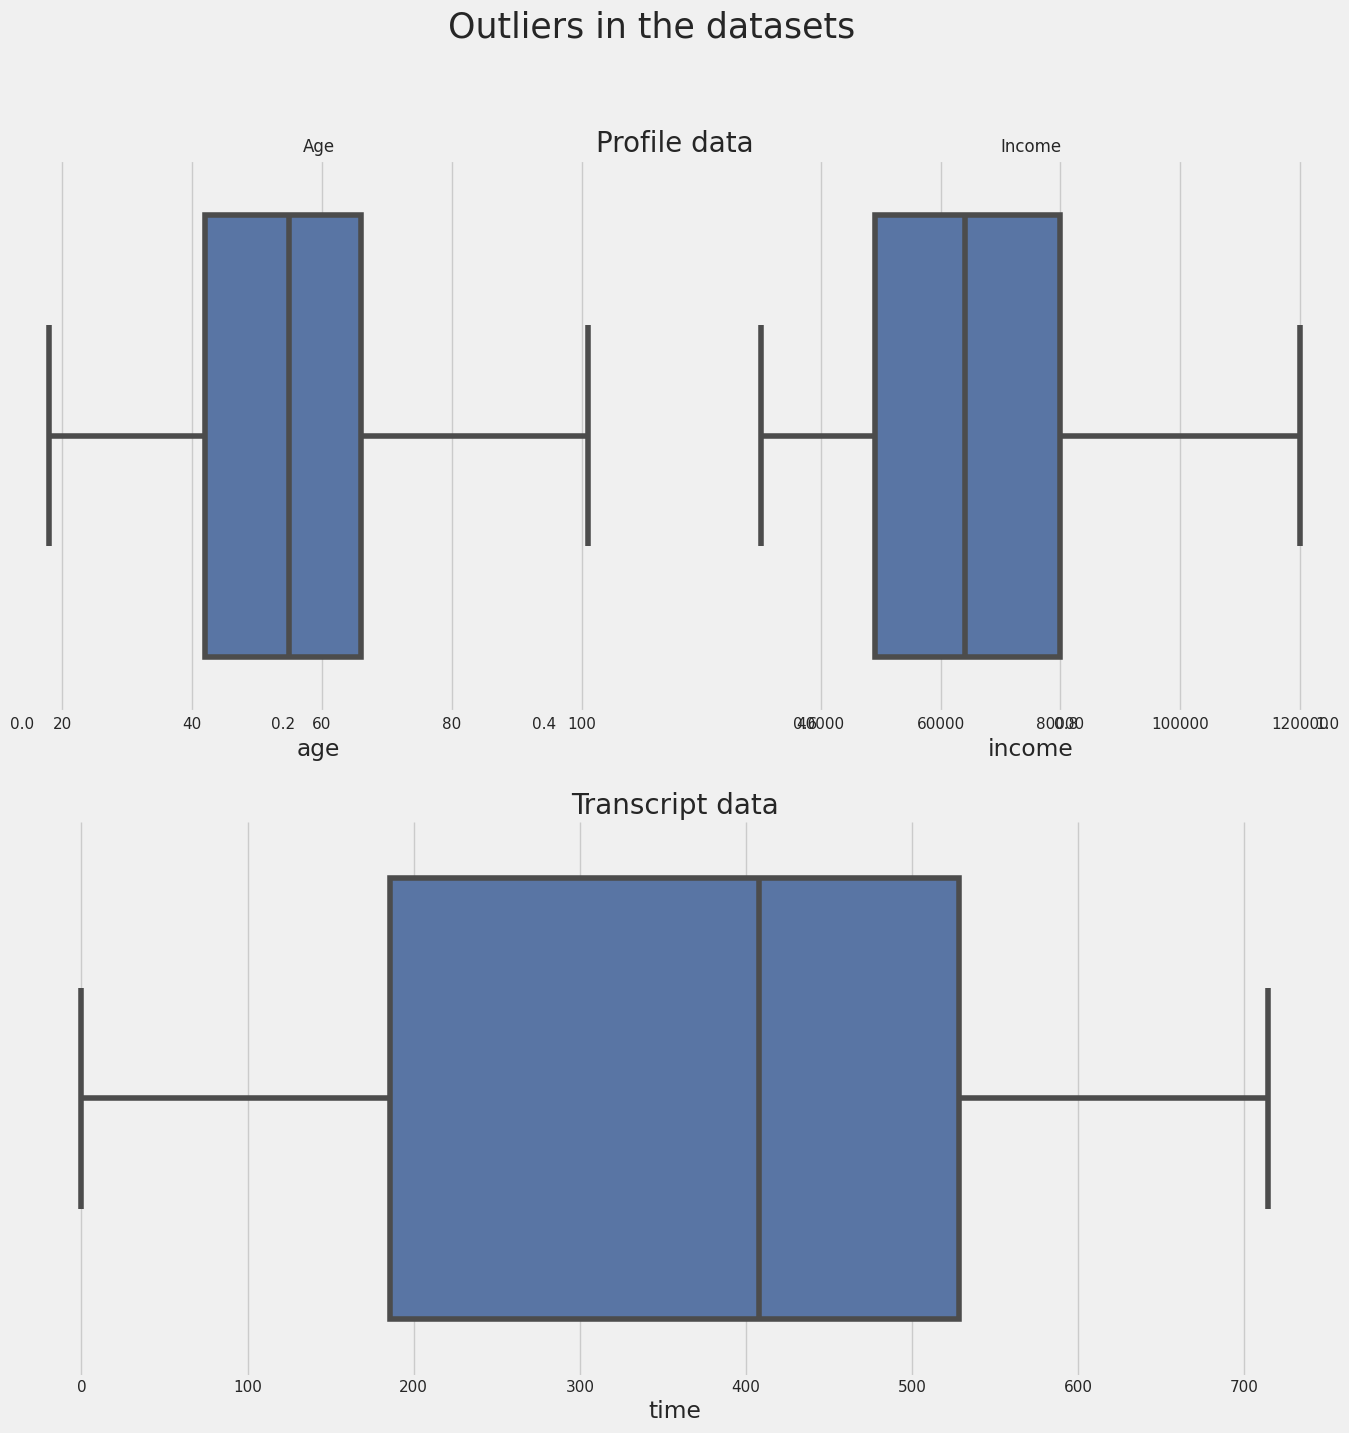

In [32]:
%matplotlib inline 
sns.set()
plt.style.use("fivethirtyeight")

# Plotting 
fig, big_axes = plt.subplots(figsize=(15.0, 15.0) , nrows=2, ncols=1, sharey=False) 
fig.suptitle('Outliers in the datasets', fontsize=25)
sns.despine(left=True, bottom= True)

# PROFILE DATA
big_axes[0].set_title("Profile data", fontsize=20)
big_axes[0].set_yticks([], [])

# age
ax_21 = fig.add_subplot(2,2,1)
ax_21.set_title("Age", fontsize=12)
ax_21.set_yticks([], minor=True)
sns.boxplot(profile["age"], color="b", ax=ax_21)

# income
ax_22 = fig.add_subplot(2,2,2)
ax_22.set_title("Income", fontsize=12)
sns.boxplot(profile["income"], color="b", ax=ax_22)


# TRANSCRIPT DATA 
big_axes[1].set_title("Transcript data", fontsize=20)
big_axes[1].set_yticks([], minor=True)
sns.boxplot(transcript["time"], color="b", ax=big_axes[1])

There are not outliers in the dataset. The data is ready for further visualizations and modeling. 

**Create data csv data for dashboards**

In [33]:
# Write the clean data to .csv files
portfolio.to_csv(r"data/output/portfolio_clean.csv", index=False)
profile.to_csv(r"data/output/profile_clean.csv", index=False)
transcript.to_csv(r"data/output/transcript_clean.csv", index=False)

# RFM Analysis


**RFM (Recency, Frequency, Monetary) analysis** is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service
<br>
**Recency** : the number of days since last purchase

In [34]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer_id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


RFM analysis focuses on when the customer bought the goods, therefore in this case is where the transaction was completed. The transcript dataset was filtered to retrieve the records where the transactions were completed. They were then stored in 'sales_data' dataframe. 

In [35]:
sales_data = transcript[transcript["event"]=="transaction"].reset_index(drop=True)
sales_data.head()

,person,event,value,time
0,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0
2,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0
3,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0
4,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0


In this dataset 'time' feature was the recency in RFM. It represented the number of days since the customer last visited Starbucks. The person_id column and 'time' feature which is the recency were retrieved. The first five records were then inspected. 

In [36]:
rfm_data = sales_data[["person", "time"]].groupby("person").min().reset_index()
rfm_data.rename({"time":"recency"}, axis=1, inplace=True)
rfm_data.head()

,person,recency
0,0009655768c64bdeb2e877511632db8f,228
1,00116118485d4dfda04fdbaba9a87b5c,294
2,0011e0d4e6b944f998e987f904e8c1e5,132
3,0020c2b971eb4e9188eac86d93036a77,54
4,0020ccbbb6d84e358d3414a3ff76cffd,42


merge with the sales data 

In [37]:
# sales_data = sales_data.merge(recency_data, on="person")
# sales_data.shape

In [38]:
# sales_data.head()

**Frequency** : Who has purchased frequently? It means the total number of purchases for each customer. ( high frequency). Some customers purchased once(their frequency is one) while other customers made several transactions (their frequency=number of transactions made)
<br>
Number of transaction on each individual will be extracted here.

In [39]:
frequency = sales_data["person"].value_counts()

# Create a frequency dataframe
frequency_df = pd.DataFrame({
    "person":frequency.index,
    "frequency":frequency.values
})


frequency_df.head()

,person,frequency
0,79d9d4f86aca4bed9290350fb43817c2,36
1,8dbfa485249f409aa223a2130f40634a,36
2,94de646f7b6041228ca7dec82adb97d2,35
3,b1f4ece7d49342628a9ed77aee2cde58,32
4,5e60c6aa3b834e44b822ea43a3efea26,32


the frequency values were latter appended to the rfm_data

In [40]:
rfm_data = rfm_data.merge(frequency_df, left_on="person", right_on="person")
rfm_data.head()

,person,recency,frequency
0,0009655768c64bdeb2e877511632db8f,228,8
1,00116118485d4dfda04fdbaba9a87b5c,294,3
2,0011e0d4e6b944f998e987f904e8c1e5,132,5
3,0020c2b971eb4e9188eac86d93036a77,54,8
4,0020ccbbb6d84e358d3414a3ff76cffd,42,12


In [41]:
# rfm_data["frequency"] = frequency.values
# rfm_data.tail()

**Monetary**: Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

In [42]:
# Get the transaction values 
values = [ast.literal_eval(value) for value in sales_data["value"]]
amount = [value["amount"] for value in values]

# Append to the sales dataset 
sales_data["amount"] = amount

# verify the operation 
sales_data.head()

,person,event,value,time,amount
0,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0,0.83
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0,34.56
2,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0,13.23
3,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0,19.51
4,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0,18.97


In [43]:
# Calculate the total amount each customer spend and append on the rfm_data
monetary_df = sales_data[["person", "amount"]].groupby("person").sum()
monetary_df.reset_index(inplace=True)
monetary_df.head()

,person,amount
0,0009655768c64bdeb2e877511632db8f,127.60
1,00116118485d4dfda04fdbaba9a87b5c,4.09
2,0011e0d4e6b944f998e987f904e8c1e5,79.46
3,0020c2b971eb4e9188eac86d93036a77,196.86
4,0020ccbbb6d84e358d3414a3ff76cffd,154.05


In [44]:
# Merge monetary dataframe with rfm data 

rfm_data = rfm_data.merge(monetary_df, left_on="person", right_on="person")
rfm_data.rename({"amount":"monetary"}, axis=1, inplace = True)
rfm_data.head()

,person,recency,frequency,monetary
0,0009655768c64bdeb2e877511632db8f,228,8,127.60
1,00116118485d4dfda04fdbaba9a87b5c,294,3,4.09
2,0011e0d4e6b944f998e987f904e8c1e5,132,5,79.46
3,0020c2b971eb4e9188eac86d93036a77,54,8,196.86
4,0020ccbbb6d84e358d3414a3ff76cffd,42,12,154.05


In [45]:
# # Append to rfm data 
# rfm_data["monetary"] = monetary_df["amount"].values
# rfm_data

Make the quartiles


The recency, frequency and monetary values were divided into five pentiles. The pentiles were names from '1' to '5' where '1' represented first priority customer while '5' represented the least priority customer. 

In [46]:
rfm_data['r_pentile'] = pd.qcut(rfm_data['recency'], 5, ['1','2','3','4','5'])
rfm_data['f_pentile'] = pd.qcut(rfm_data['frequency'], 5, ['5','4','3','2','1'])
rfm_data['m_pentile'] = pd.qcut(rfm_data['monetary'], 5, ['5', '4','3','2','1'])

rfm_data.tail()

,person,recency,frequency,monetary,r_pentile,f_pentile,m_pentile
16573,fff3ba4757bd42088c044ca26d73817a,6,11,580.98,1,2,1
16574,fff7576017104bcc8677a8d63322b5e1,36,6,29.94,2,4,4
16575,fff8957ea8b240a6b5e634b6ee8eafcf,18,5,12.15,1,4,5
16576,fffad4f4828548d1b5583907f2e9906b,36,12,88.83,2,2,3
16577,ffff82501cea40309d5fdd7edcca4a07,60,15,226.07,2,1,1


All the pentile labels were merged to a single string called the RFM score. The customers having RFM score of '555' were best since the were the most recent, most frequent and spent most on Starbucks

In [47]:
rfm_data['RFM_Score'] = rfm_data.r_pentile.astype(str)+ rfm_data.f_pentile.astype(str) + rfm_data.m_pentile.astype(str)
rfm_data.head()

,person,recency,frequency,monetary,r_pentile,f_pentile,m_pentile,RFM_Score
0,0009655768c64bdeb2e877511632db8f,228,8,127.60,4,3,2,432
1,00116118485d4dfda04fdbaba9a87b5c,294,3,4.09,5,5,5,555
2,0011e0d4e6b944f998e987f904e8c1e5,132,5,79.46,4,4,3,443
3,0020c2b971eb4e9188eac86d93036a77,54,8,196.86,2,3,1,231
4,0020ccbbb6d84e358d3414a3ff76cffd,42,12,154.05,2,2,2,222


The first priority customer are the ones with  score '1' in all the fields. They had an RFM score of 111

In [48]:
rfm_data[rfm_data["RFM_Score"]=="111"]

,person,recency,frequency,monetary,r_pentile,f_pentile,m_pentile,RFM_Score
13,00715b6e55c3431cb56ff7307eb19675,12,15,375.12,1,1,1,111
124,020cd0f8047142e18a754303f9337d53,0,13,232.90,1,1,1,111
127,0215efe5136d4a038cb81eae92d59368,6,13,767.29,1,1,1,111
129,0217c4393fd54e74a523b63c0fcc3da5,6,13,230.21,1,1,1,111
156,028c88a958e54c36a31c4800fd6e887b,24,14,372.02,1,1,1,111
...,...,...,...,...,...,...,...,...
16509,fee2d799672d4f81bfa3237207290f79,6,21,361.49,1,1,1,111
16535,ff4e747db62441979fbbc18d871c42b1,12,17,236.22,1,1,1,111
16536,ff56a64e9a0e4bf5919723f31bce5965,18,14,217.16,1,1,1,111
16546,ff7fdf82996949ec82d158a02a1d9cca,6,17,255.05,1,1,1,111


In [49]:
big_spenders = rfm_data[rfm_data["RFM_Score"]=="111"]
big_spenders.reset_index(drop=True, inplace=True)
big_spenders.to_csv(r"data/output/bigspenders.csv") #write the data locally

 # **K Means CLustering** 

In this analysis, customers will be clustered based on the monetary, age and income. The spending score will be calculated for each individual customer. The spending score ranges from 0 to 100. It is the fraction of the customers total spending to the available maximum spending 

In [51]:
# Calculationg spending score 

# Filter the data
spending_data = rfm_data[["person", "monetary"]]

spending_data["spending_score"] = ((spending_data["monetary"]/spending_data["monetary"].max())*100).astype(int)

In [52]:
profile.head()

,gender,age,id,income
0,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0
2,M,68,e2127556f4f64592b11af22de27a7932,70000.0
3,M,65,389bc3fa690240e798340f5a15918d5c,53000.0
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0


The data was merged to find the how each customer on the profile spend. 

In [53]:
cluster_df = spending_data.merge(profile, left_on="person", right_on="id")
cluster_df.drop("id", axis=1, inplace=True)
cluster_df.head()

,person,monetary,spending_score,gender,age,income
0,0009655768c64bdeb2e877511632db8f,127.60,7,M,33,72000.0
1,0011e0d4e6b944f998e987f904e8c1e5,79.46,4,O,40,57000.0
2,0020c2b971eb4e9188eac86d93036a77,196.86,12,F,59,90000.0
3,0020ccbbb6d84e358d3414a3ff76cffd,154.05,9,F,24,60000.0
4,003d66b6608740288d6cc97a6903f4f0,48.34,3,F,26,73000.0


The data will be clustered in two ways; based on age and spending score, based on income and spending score

### **Income and spending score KMeans clustering**
<br>
The income and spending score datasets will be filtered

In [54]:
X_income = cluster_df.loc[:,["income", "spending_score"]].values
X_income

array([[7.2e+04, 7.0e+00],
       [5.7e+04, 4.0e+00],
       [9.0e+04, 1.2e+01],
       ...,
       [5.6e+04, 0.0e+00],
       [3.4e+04, 5.0e+00],
       [6.2e+04, 1.4e+01]])

The X data will clustered in cluster range of 1 to 11 to find the optimal clusters. A line graph will be plotted and elbow will be found on the line chart. That's where the optimal number of clusters lie. 

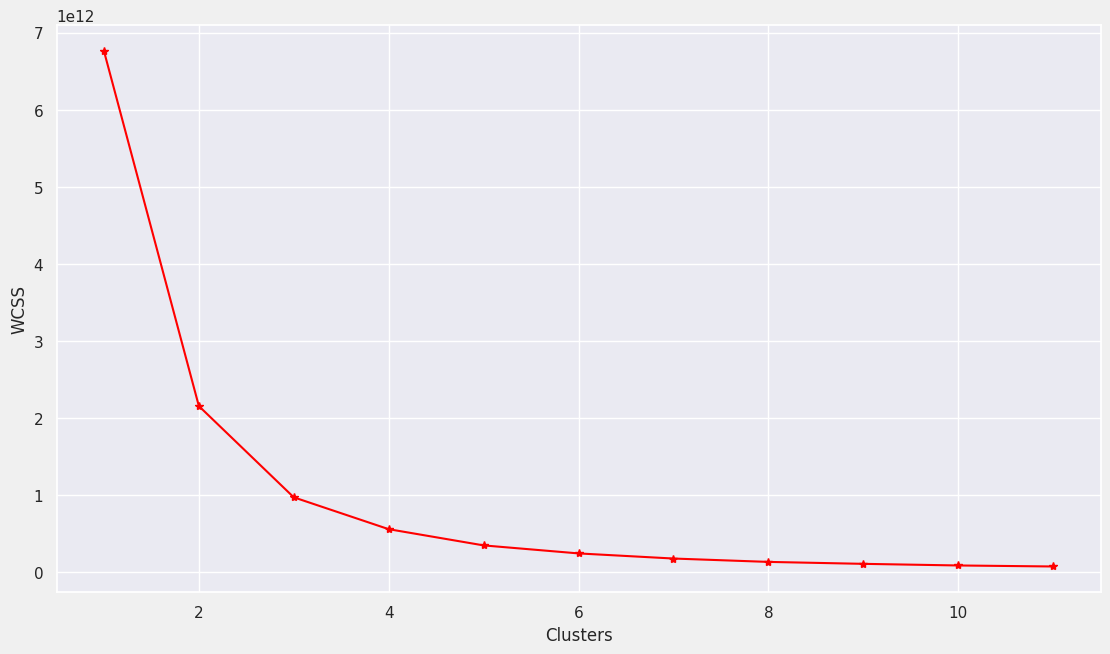

In [55]:
wcss = []

for i in range(1, 12):
    KM = KMeans(n_clusters=i, init="k-means++")
    KM.fit(X_income)
    wcss.append(KM.inertia_)
    
# Plot the line chart 
plt.figure(figsize=(12, 7))
sns.set()
plt.plot(range(1,12), wcss, color="red", marker="*")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

The elbow is at 3. Thats where the line starts to stagnate. Therefore the optimal number of clusters in income and spending score is 3

In [56]:
KM = KMeans(n_clusters=3) #Created Kmean model with optimal number of clusters 
income_clusters = KM.fit_predict(X_income)
income_clusters

array([2, 2, 1, ..., 0, 0, 2], dtype=int32)

Lets now find the cluster centers

In [57]:
KM.cluster_centers_

array([[4.39135869e+04, 4.24674165e+00],
       [9.74379705e+04, 1.11364975e+01],
       [6.87984921e+04, 7.32350925e+00]])

Now lets finally visualize the clusters on a graph

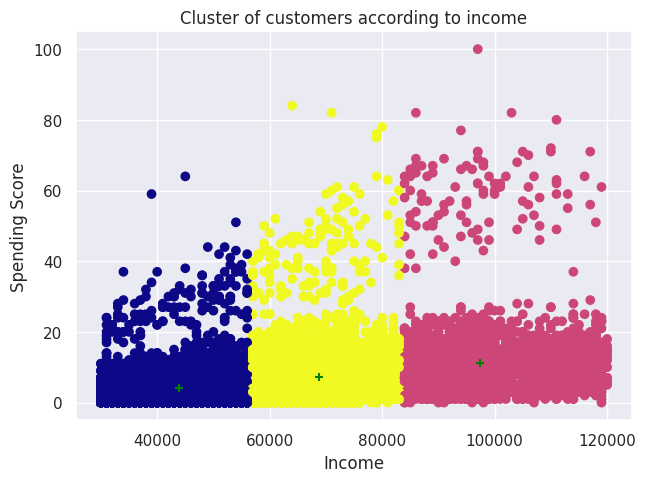

In [58]:
plt.scatter(X_income[:, 0], X_income[:, 1], c=KM.labels_, cmap = "plasma")
plt.scatter(KM.cluster_centers_[:,0], KM.cluster_centers_[:,1], color="green", marker = "+")
plt.title("Cluster of customers according to income")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()

All the clusters exhibit the same behaviour however the blue clusters have spending most. These are people with income range between 60000 to 80000. Thats' where starbucks should focus on adds 

### **Age and spending score KMeans clustering**

The age and spending score data will be filtered

In [59]:
X_age = cluster_df.loc[:,["age", "spending_score"]].values
X_age

array([[33,  7],
       [40,  4],
       [59, 12],
       ...,
       [71,  0],
       [34,  5],
       [45, 14]])

The X age data will clustered in cluster range of 1 to 11 to find the optimal clusters. A line graph will be plotted and elbow will be found on the line chart. That's where the optimal number of clusters lie. 

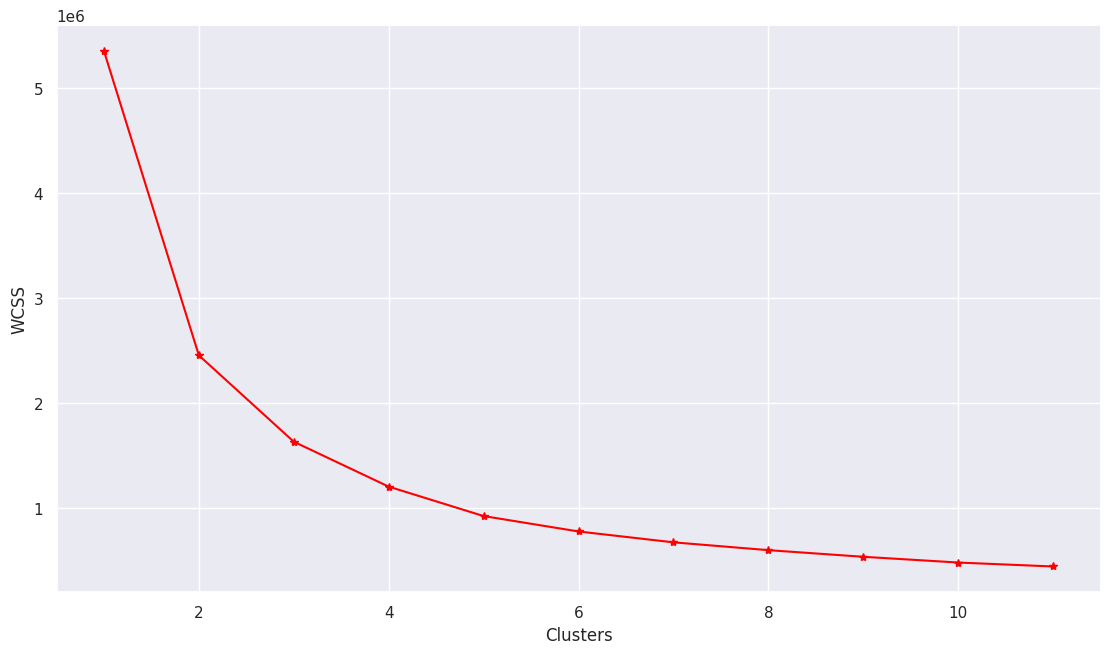

In [60]:
wcss = []

for i in range(1, 12):
    KM = KMeans(n_clusters=i, init="k-means++")
    KM.fit(X_age)
    wcss.append(KM.inertia_)
    
# Plot the line chart 
plt.figure(figsize=(12, 7))
sns.set()
plt.plot(range(1,12), wcss, color="red", marker="*")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

The elbow is at 3. Thats where the line starts to stagnate. Therefore the optimal number of clusters in age and spending score is 

In [61]:
KM = KMeans(n_clusters=3)
income_clusters = KM.fit_predict(X_age)
income_clusters

array([1, 1, 2, ..., 0, 1, 2], dtype=int32)

Finding cluster centers 

In [62]:
KM.cluster_centers_

array([[74.75974026,  7.68783069],
       [31.45300053,  5.14206054],
       [54.4611754 ,  7.49345311]])

cluster centers along with the wcss and age will visualized onto a scatter plot. The scatterplot will show the clusters with the centroids

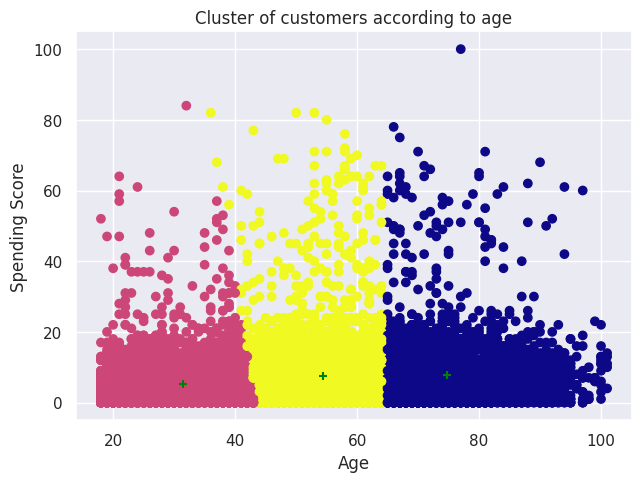

In [63]:
plt.scatter(X_age[:, 0], X_age[:, 1], c=KM.labels_, cmap = "plasma")
plt.scatter(KM.cluster_centers_[:,0], KM.cluster_centers_[:,1], color="green", marker = "+")
plt.title("Cluster of customers according to age")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

The scatter plot shows the yellow cluster had the highest spending score. The yellow cluster include all the age groups but its most dense at age around 60, thats between 55years to 65 years